In [1]:
import csv
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:


import pandas as pd
citydailydata = pd.read_csv('./data/city_day.csv')

citydailydata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.3+ MB


In [3]:


def getMissingValues(data):
    missing_val = data.isnull().sum()
    missing_val_percentage = 100 * data.isnull().sum() / len(data)
    missin_values_array = pd.concat([missing_val, missing_val_percentage], axis=1)
    missin_values_array = missin_values_array.rename(columns = 
                                                     {0 : 'Missing Values', 1 : '% of Total Values'})
    missin_values_array = missin_values_array[
        missin_values_array.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print('------------------------------------------------------------------------------')
    print('MISSING VALUES IN DATA:\n------------------------------------------------------------------------------\n', missin_values_array, '\n')
    return missin_values_array

def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

def subsetColumns(data):
    pollutants = ['Particulate_Matter', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutants
    data = data[columns]
    return data, pollutants

def handleMissingValues(data):
    missing_values = getMissingValues(data)
    updatedCityData = mergeColumns(data)
    updatedCityData, pollutants = subsetColumns(updatedCityData)
    return updatedCityData, pollutants

updatedCityData, newColumns = handleMissingValues(citydailydata)
print('------------------------------------------------------------------------------')
print('UPDATED DATA:\n------------------------------------------------------------------------------\n')
updatedCityData
newColumns.append('AQI')





------------------------------------------------------------------------------
MISSING VALUES IN DATA:
------------------------------------------------------------------------------
             Missing Values  % of Total Values
Xylene               18109               61.3
PM10                 11140               37.7
NH3                  10328               35.0
Toluene               8041               27.2
Benzene               5623               19.0
AQI                   4681               15.9
AQI_Bucket            4681               15.9
PM2.5                 4598               15.6
NOx                   4185               14.2
O3                    4022               13.6
SO2                   3854               13.1
NO2                   3585               12.1
NO                    3582               12.1
CO                    2059                7.0 

------------------------------------------------------------------------------
UPDATED DATA:
--------------------------------

In [4]:

#. Visualising the time series data
#. Visualising the amount of pollutants in air over the years

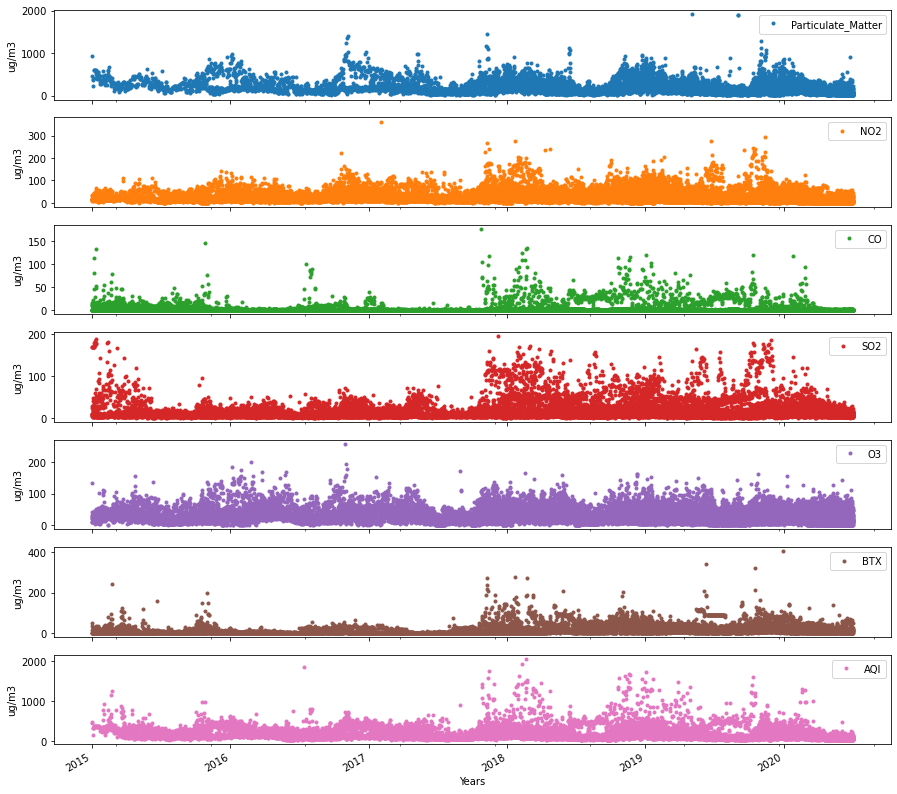

In [5]:
def visualisePollutants(udata, columns):
    data = udata.copy()
    data.set_index('Date',inplace=True)
    axes = data[columns].plot(marker='.', linestyle='None', figsize=(15, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('ug/m3')

visualisePollutants(updatedCityData, newColumns)



In [6]:

#. Visualising the amount of pollutants in air over the years and months

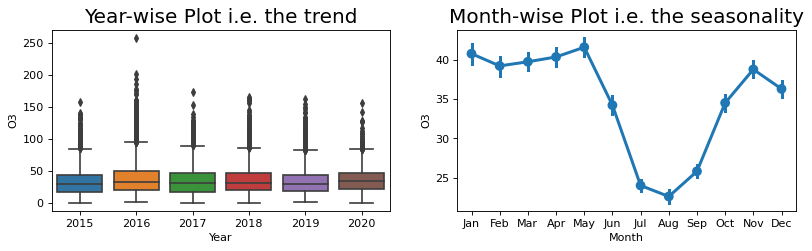

In [7]:
def trend_plot(updatedCityData, value):
    data = updatedCityData.copy()
    data['Year'] = [d.year for d in data.Date]
    data['Month'] = [d.strftime('%b') for d in data.Date]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=data.loc[~data.Year.isin([2015, 2020]), :])
    
    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()

value='O3'
trend_plot(updatedCityData,value)



In [8]:
#aqi

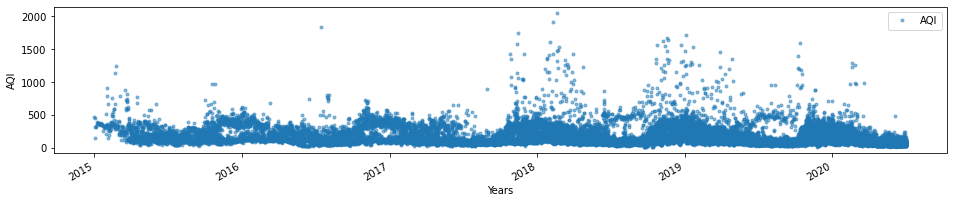

In [9]:
def visualiseAQI(udata, columns):
    data = udata.copy()
    data.set_index('Date',inplace=True)
            
    axes = data[columns].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 3), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('AQI')

visualiseAQI(updatedCityData, ['AQI'])



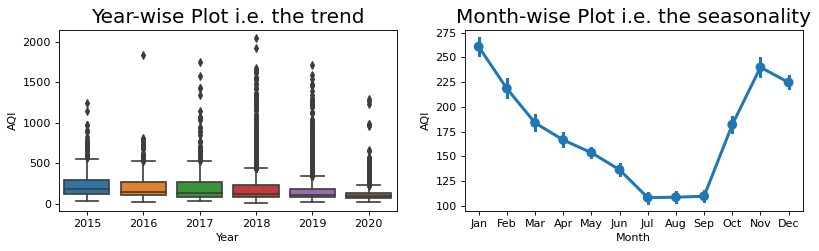

In [10]:
value='AQI'
trend_plot(updatedCityData,value)

In [11]:
#. Cities and Pollution
#. Most Polluted cities

In [12]:
def max_polluted_city(pollutant, data):
    x1 = data[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='coolwarm')

pm = max_polluted_city('Particulate_Matter', updatedCityData)
no2 = max_polluted_city('NO2', updatedCityData)
so2 = max_polluted_city('SO2', updatedCityData)
co = max_polluted_city('CO', updatedCityData)
o3 = max_polluted_city('O3', updatedCityData)
BTX = max_polluted_city('BTX', updatedCityData)
aqi = max_polluted_city('AQI', updatedCityData)

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

display_side_by_side(pm,no2,so2,o3,BTX)



,City,Particulate_Matter
0,Delhi,352.480000
1,Gurugram,289.980000
2,Talcher,233.790000
3,Jorapokhar,198.450000
4,Patna,192.580000
5,Brajrajnagar,189.680000
6,Kolkata,179.990000
7,Guwahati,179.890000
8,Jaipur,178.000000
9,Amritsar,173.950000


In [13]:

#. AQI of some cities

Text(0.5, 0, 'Years')

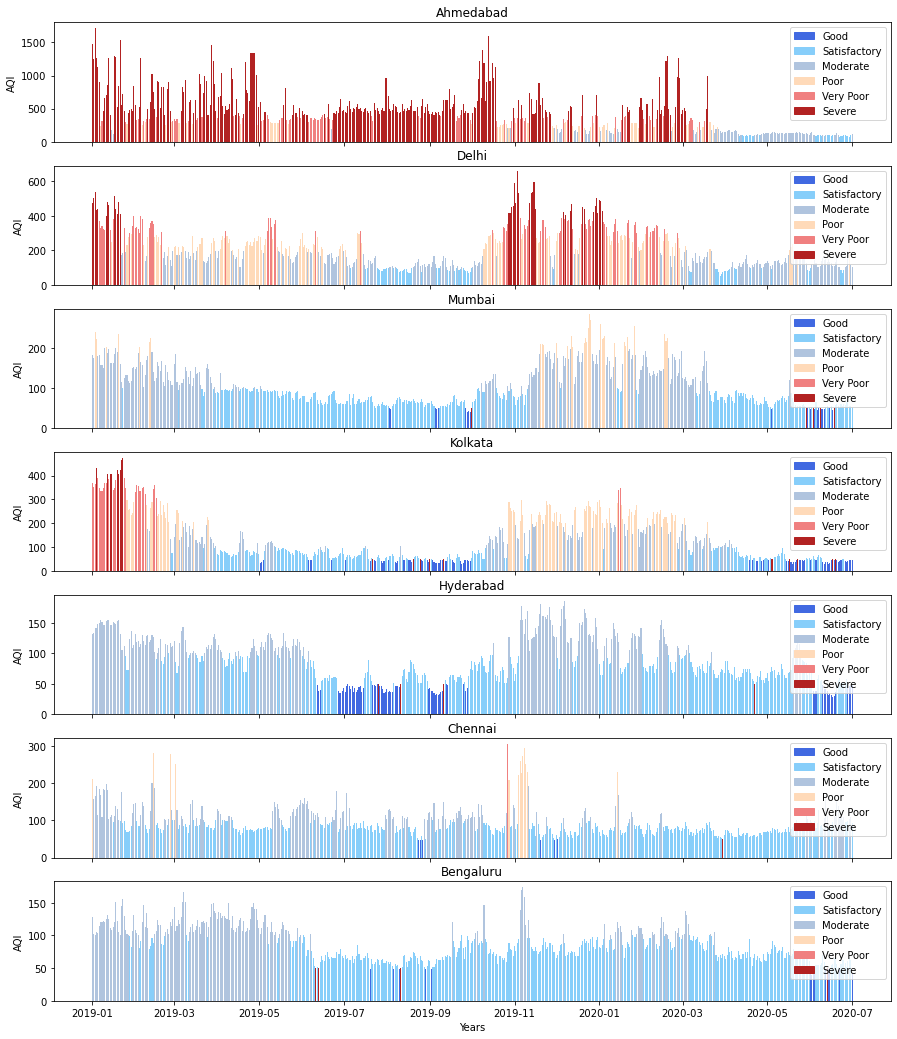

In [14]:
cities = ['Ahmedabad','Delhi','Mumbai','Kolkata','Hyderabad', 'Bengaluru','Chennai']
filtered_city_day = updatedCityData[updatedCityData['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]

AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)

def getColorBar(city):
    col = []
    for val in AQI_pivot[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue')
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        else:
            col.append('firebrick')
    return col


ah = getColorBar('Ahmedabad')
de = getColorBar('Delhi')
mu = getColorBar('Mumbai')
ko = getColorBar('Kolkata')
hy = getColorBar('Hyderabad')
ch = getColorBar('Chennai')
bl = getColorBar('Bengaluru')

colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        
f, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7)) = plt.subplots(7, 1, sharex='col', sharey='row', figsize=(15,18))
ax1.bar(AQI_pivot.index, AQI_pivot['Ahmedabad'], color = ah, width = 0.75)
ax2.bar(AQI_pivot.index, AQI_pivot['Delhi'], color = de, width = 0.75)
ax3.bar(AQI_pivot.index, AQI_pivot['Mumbai'], color = mu, width = 0.75)
ax4.bar(AQI_pivot.index, AQI_pivot['Kolkata'], color = ko, width = 0.75)
ax5.bar(AQI_pivot.index, AQI_pivot['Hyderabad'], color = hy, width = 0.75)
ax6.bar(AQI_pivot.index, AQI_pivot['Chennai'], color = ch, width = 0.75)
ax7.bar(AQI_pivot.index, AQI_pivot['Bengaluru'], color = bl, width = 0.75)

ax1.legend(handles, labels, loc='upper right')
ax2.legend(handles, labels, loc='upper right')
ax3.legend(handles, labels, loc='upper right')
ax4.legend(handles, labels, loc='upper right')
ax5.legend(handles, labels, loc='upper right')
ax6.legend(handles, labels, loc='upper right')
ax7.legend(handles, labels, loc='upper right')

ax1.title.set_text('Ahmedabad')
ax2.title.set_text('Delhi')
ax3.title.set_text('Mumbai')
ax4.title.set_text('Kolkata')
ax5.title.set_text('Hyderabad')
ax6.title.set_text('Chennai')
ax7.title.set_text('Bengaluru')

ax1.set_ylabel('AQI')
ax2.set_ylabel('AQI')
ax3.set_ylabel('AQI')
ax4.set_ylabel('AQI')
ax5.set_ylabel('AQI')
ax6.set_ylabel('AQI')
ax7.set_ylabel('AQI')
ax7.set_xlabel('Years')



In [15]:

#. Effect of Lockdown on AQI
#. AQI in the year 2020 - City-wise

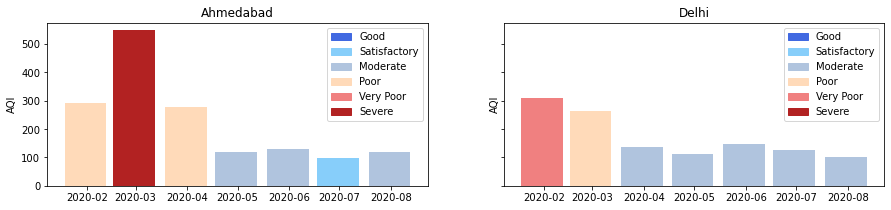

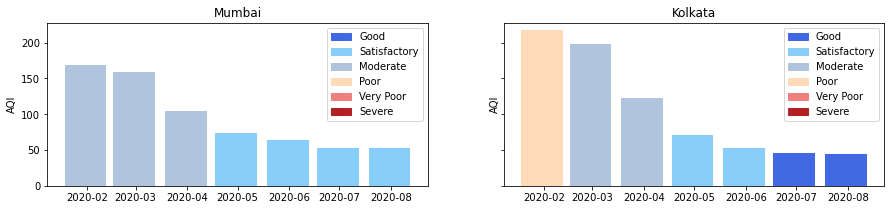

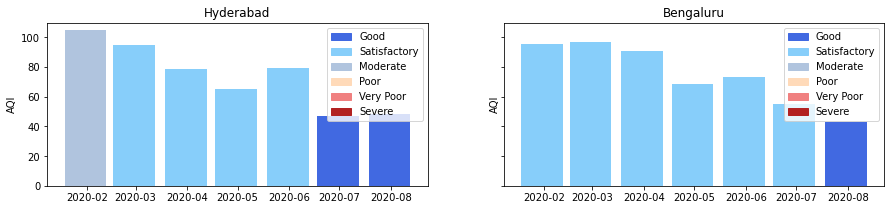

In [16]:
AQI_2020 = AQI_pivot[AQI_pivot.index > '2019-12-31']
AQI_2020 = AQI_2020.resample('M').mean()

def getColorBar(city):
    col = []
    for val in AQI_2020[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue')
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        else:
            col.append('firebrick')
    return col

for i in range(0, 6, 2):
    city_1 = cities[i]
    city_2 = cities[i+1]
    fig, ((ax1, ax2)) =  plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,3))
    ax1.bar(AQI_2020.index, AQI_2020[city_1], width = 25, color=getColorBar(city_1))
    ax1.title.set_text(city_1)
    ax1.set_ylabel('AQI')
    
    colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax1.legend(handles, labels, loc='upper right')
    
    ax2.bar(AQI_2020.index, AQI_2020[city_2], width = 25, color=getColorBar(city_2))
    ax2.title.set_text(city_2)
    ax2.set_ylabel('AQI')
    
    colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax2.legend(handles, labels, loc='upper right')
    

In [17]:

#. AQI before and after Lockdown

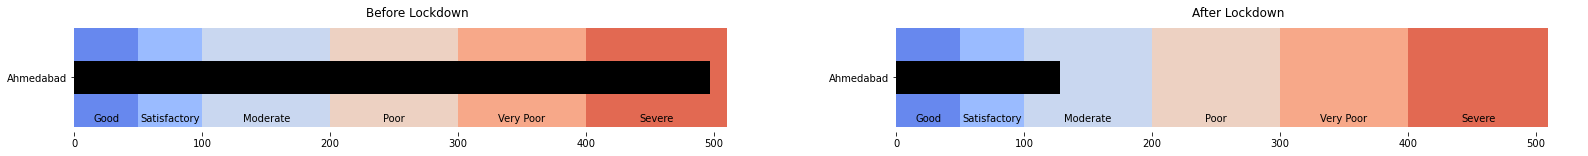

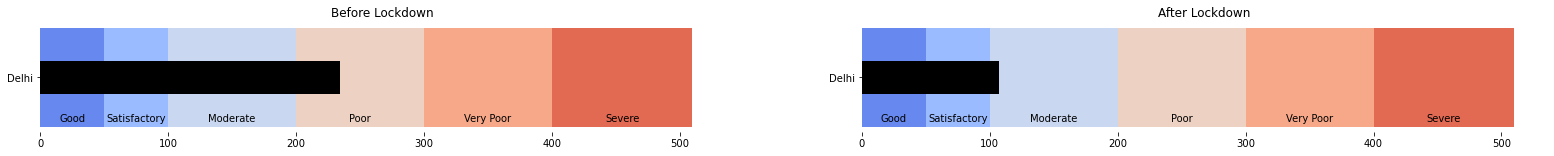

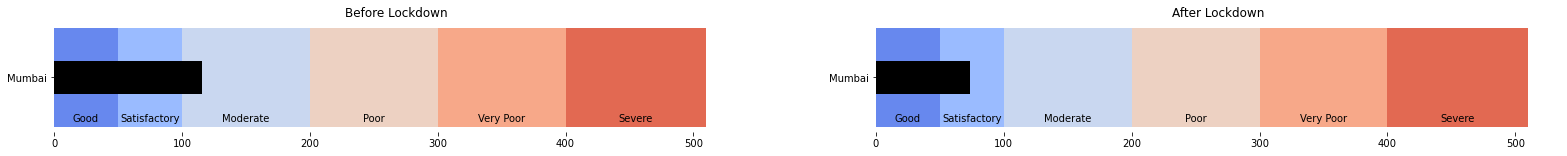

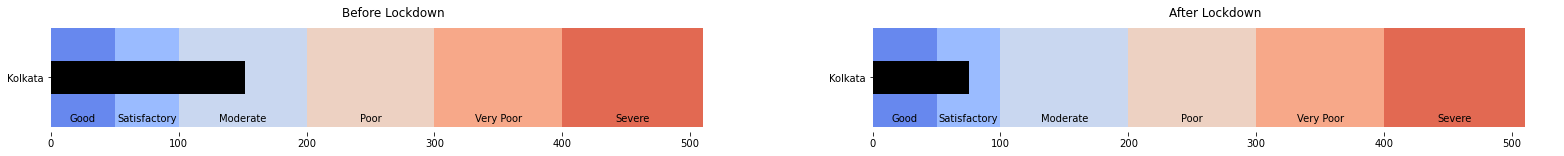

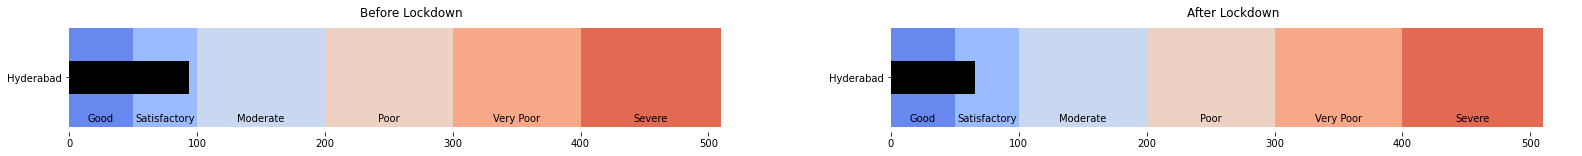

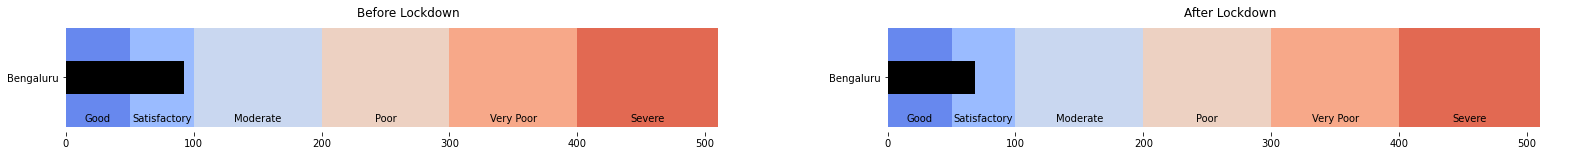

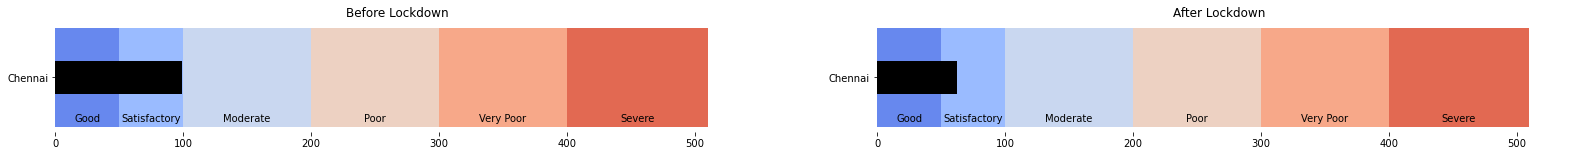

In [18]:


AQI_beforeLockdown = AQI_pivot['2015-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']
limits = [50, 100, 200, 300, 400, 510]
palette = sns.color_palette("coolwarm", len(limits))
for city in cities:
    aqi_before = AQI_beforeLockdown[city].mean()
    aqi_after = AQI_afterLockdown[city].mean()
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(27, 2))
    ax1.set_yticks([1])
    ax1.set_yticklabels([city])
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax1.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax1.barh([1], aqi_before, color='black', height=5)
    
    ax2.set_yticks([1])
    ax2.set_yticklabels([city])
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax2.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax2.barh([1], aqi_after, color='black', height=5)
    
    ax1.set_title('Before Lockdown')
    ax2.set_title('After Lockdown')
    
    rects = ax1.patches
    labels=["Good", "Satisfactory", "Moderate", "Poor", 'Very Poor', 'Severe']
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax1.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')
        ax2.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')



In [19]:
#sd

In [20]:
data = updatedCityData.copy()
data['Year'] = [d.year for d in data.Date]
print(data[data['Year']==2019].AQI.mean())
print(data[data['Year']==2020].AQI.mean())
print(data[data['Year']==2020].AQI.std()/np.sqrt(len(data[data['Year']==2020])))

covid = pd.read_csv("./data/state_wise_daily.csv")
covid_status = ["Confirmed", "Recovered", "Deceased"]
covid['Date'] = pd.to_datetime(covid['Date_YMD'])
covid.set_index('Date', inplace=True)
print(covid)

156.51817281855466
113.52069667496042
1.2243116300235775
              Date_YMD     Status     TT  AN   AP  AR   AS  BR  CH  CT  ...  \
Date                                                                    ...   
2020-03-14  2020-03-14  Confirmed     81   0    1   0    0   0   0   0  ...   
2020-03-14  2020-03-14  Recovered      9   0    0   0    0   0   0   0  ...   
2020-03-14  2020-03-14   Deceased      2   0    0   0    0   0   0   0  ...   
2020-03-15  2020-03-15  Confirmed     27   0    0   0    0   0   0   0  ...   
2020-03-15  2020-03-15  Recovered      4   0    0   0    0   0   0   0  ...   
...                ...        ...    ...  ..  ...  ..  ...  ..  ..  ..  ...   
2021-10-30  2021-10-30  Recovered  14672   1  535  10  371   2   2  17  ...   
2021-10-30  2021-10-30   Deceased    445   0    2   0    4   0   0   1  ...   
2021-10-31  2021-10-31  Confirmed  12907   0  385   1  212   8   5  32  ...   
2021-10-31  2021-10-31  Recovered  13152   0  675   9  236   9   3  32  ..

------------------------------------------------------------------------------
MISSING VALUES IN DATA:
------------------------------------------------------------------------------
 Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: [] 



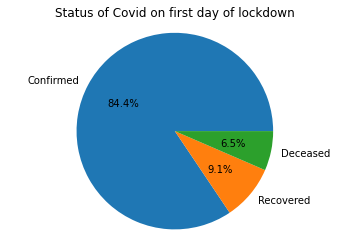

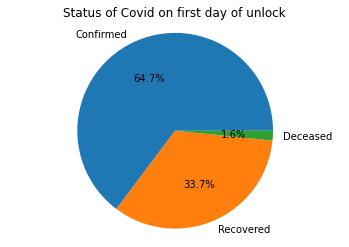

In [21]:
getMissingValues(covid)
covid.describe()
covidStart = covid[covid['Date_YMD'] == '2020-03-26']
totalValues =[covidStart[covidStart['Status']=='Confirmed']['TT'].sum(), covidStart[covidStart['Status']=='Recovered']['TT'].sum(), covidStart[covidStart['Status']=='Deceased']['TT'].sum()]
plt.pie(totalValues, labels=covid_status, autopct='%1.1f%%')
plt.title("Status of Covid on first day of lockdown")
plt.axis('equal')
plt.show()


covidStart = covid[covid['Date_YMD'] == '2020-05-21']
totalValues =[covidStart[covidStart['Status']=='Confirmed']['TT'].sum(), covidStart[covidStart['Status']=='Recovered']['TT'].sum(), covidStart[covidStart['Status']=='Deceased']['TT'].sum()]
plt.pie(totalValues, labels=covid_status, autopct='%1.1f%%')
plt.title("Status of Covid on first day of unlock")
plt.axis('equal')
plt.show()

In [22]:

correlationDict = dict.fromkeys(newColumns, dict.fromkeys(covid_status, []))
from scipy.stats import pearsonr
for pollu in newColumns:
    for status in covid_status:

        data = data[data['Date'] > '2020-03-14'].copy()
        data = data[data['Date'] <= '2020-05-01']
        dsample = data.groupby(['Date'])
        dsample = dsample[pollu].mean().to_frame(name=pollu)
        x1 = dsample[pollu].values
        data2 = covid[covid['Date_YMD'] > '2020-03-14'].copy()
        data2 = data2[data2['Date_YMD'] <= '2020-05-01']
        x2 = data2[data2['Status'] == status]['TT'].values
        stat, p = pearsonr(x1, x2)
        if p > 0.05:
            correlationDict[pollu][status].append(False)
            pass
        else:
            correlationDict[pollu][status].append(True)
#             print("Pollutant:", pollu, "for", status, "status of covid patient is dependent based on Pearson Test")

In [23]:
from scipy.stats import spearmanr
for pollu in newColumns:
    for status in covid_status:

        data = data[data['Date'] > '2020-03-14'].copy()
        data = data[data['Date'] <= '2020-05-01']
        dsample = data.groupby(['Date'])
        dsample = dsample[pollu].mean().to_frame(name=pollu)
        x1 = dsample[pollu].values
        data2 = covid[covid['Date_YMD'] > '2020-03-14'].copy()
        data2 = data2[data2['Date_YMD'] <= '2020-05-01']
        x2 = data2[data2['Status'] == status]['TT'].values
        stat, p = spearmanr(x1, x2)
        if p > 0.05:
            correlationDict[pollu][status].append(False)
            pass
        else:
            correlationDict[pollu][status].append(True)
#             print("Pollutant:", pollu, "for", status, "status of covid patient is dependent based on Spearman Test")

In [24]:
from scipy.stats import kendalltau
for pollu in newColumns:
    for status in covid_status:

        data = data[data['Date'] > '2020-03-14'].copy()
        data = data[data['Date'] <= '2020-05-01']
        dsample = data.groupby(['Date'])
        dsample = dsample[pollu].mean().to_frame(name=pollu)
        x1 = dsample[pollu].values
        data2 = covid[covid['Date_YMD'] > '2020-03-14'].copy()
        data2 = data2[data2['Date_YMD'] <= '2020-05-01']
        x2 = data2[data2['Status'] == status]['TT'].values
        stat, p = kendalltau(x1, x2)
        if p > 0.05:
            correlationDict[pollu][status].append(False)
            pass
        else:
            correlationDict[pollu][status].append(True)
#             print("Pollutant:", pollu, "for", status, "status of covid patient is dependent based on Kendall Test")

In [25]:
for key, v in correlationDict.items():
    for key1, v1 in v.items():
        if sum(v1) > len(v1)*0.66 :
            print(key, " correlates with covid cases with status ", key1)

Particulate_Matter  correlates with covid cases with status  Confirmed
Particulate_Matter  correlates with covid cases with status  Recovered
Particulate_Matter  correlates with covid cases with status  Deceased
NO2  correlates with covid cases with status  Confirmed
NO2  correlates with covid cases with status  Recovered
NO2  correlates with covid cases with status  Deceased
CO  correlates with covid cases with status  Confirmed
CO  correlates with covid cases with status  Recovered
CO  correlates with covid cases with status  Deceased
SO2  correlates with covid cases with status  Confirmed
SO2  correlates with covid cases with status  Recovered
SO2  correlates with covid cases with status  Deceased
O3  correlates with covid cases with status  Confirmed
O3  correlates with covid cases with status  Recovered
O3  correlates with covid cases with status  Deceased
BTX  correlates with covid cases with status  Confirmed
BTX  correlates with covid cases with status  Recovered
BTX  correlate